<a id="t1."></a>
# 1. Import data and python packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time

import os
from IPython.display import clear_output

In [2]:
train_directory = '../Beef1/Meat/train'
test_directory  = '../Beef1/Meat/test'
valid_directory  = '../Beef1/Meat/valid'

In [3]:
# Set the desired sample size
sample_size = 1475

# Set the desired width and height for resizing images
width = 224
height = 224

In [4]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import logging

# Path ke folder gambar Melted
melted_data = "../Beef1/Melted/"
output_dir = '../Beef1/Meat/train/Melted/'

# Konfigurasi augmentasi
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest')

# List semua file dalam folder melted_data
file_list = os.listdir(melted_data)

# Loop melalui file gambar dan augmentasi
for filename in file_list:
    if filename.lower().endswith(('png', 'jpg', 'jpeg')):
        try:
            # Muat gambar
            img_path = os.path.join(melted_data, filename)
            img = load_img(img_path)
            img_array = img_to_array(img)
            img_array = img_array.reshape((1,) + img_array.shape)

            # Buat augmented images dan simpan
            i = 0
            for batch in datagen.flow(img_array, batch_size=1, 
                                      save_to_dir=output_dir, 
                                      save_prefix='Melted', 
                                      save_format='jpg'):
                i += 1
                if i >= 25:  # Simpan 20 augmented images per gambar asli
                    break

            # Logging setiap gambar yang di-augmentasi
            logging.info(f"Processed {filename}, generated {i} augmented images")

        except Exception as e:
            logging.error(f"Error processing file {filename}: {e}")

# Verifikasi jumlah gambar yang dihasilkan
augmented_files = os.listdir(output_dir)
logging.info(f"Total augmented images: {len(augmented_files)}")


R channel (6x6 array):
[[88 86 88 88 88 84]
 [87 89 86 87 86 82]
 [84 87 87 84 83 80]
 [84 87 85 82 81 74]
 [84 87 82 82 76 75]
 [83 84 84 81 78 83]]

G channel (6x6 array):
[[39 37 39 39 39 35]
 [38 40 37 38 37 33]
 [35 38 38 35 34 31]
 [35 38 36 33 32 25]
 [37 38 33 31 25 24]
 [33 34 33 30 27 32]]

B channel (6x6 array):
[[45 43 45 45 45 41]
 [44 46 43 44 43 39]
 [41 44 44 41 40 37]
 [41 44 42 39 38 31]
 [45 44 39 36 32 31]
 [42 43 40 37 34 39]]


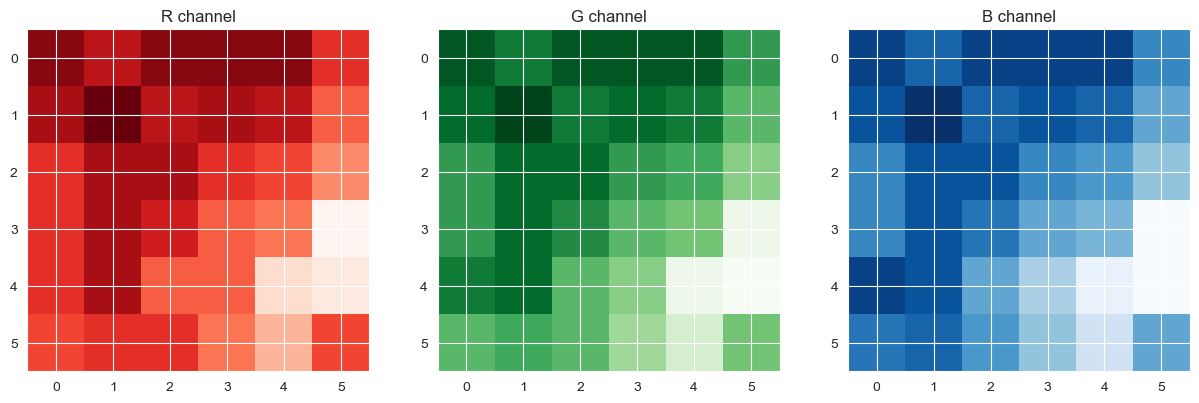

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def display_rgb_arrays(image_path, top_left_x, top_left_y):
    # Baca gambar
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Konversi dari BGR ke RGB

    # Tentukan koordinat untuk memotong bagian 6x6 dari gambar
    crop_size = 6
    x, y = top_left_x, top_left_y

    # Potong bagian 6x6 dari gambar
    cropped_img = img[y:y + crop_size, x:x + crop_size]

    # Ekstrak saluran R, G, dan B
    R = cropped_img[:, :, 0]
    G = cropped_img[:, :, 1]
    B = cropped_img[:, :, 2]

    # Tampilkan nilai piksel untuk masing-masing saluran warna
    print("R channel (6x6 array):")
    print(R)
    print("\nG channel (6x6 array):")
    print(G)
    print("\nB channel (6x6 array):")
    print(B)

    # Plotkan hasilnya menggunakan Matplotlib
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(R, cmap='Reds')
    plt.title("R channel")

    plt.subplot(1, 3, 2)
    plt.imshow(G, cmap='Greens')
    plt.title("G channel")

    plt.subplot(1, 3, 3)
    plt.imshow(B, cmap='Blues')
    plt.title("B channel")

    plt.show()

# Path ke gambar yang ingin digunakan
image_path = '../Beef1/Meat/test/fresh/Fresh (1166).jpg'
top_left_x, top_left_y = 0, 0  # Koordinat bagian atas kiri dari area yang akan dipotong

display_rgb_arrays(image_path, top_left_x, top_left_y)

R channel (6x6 array):
[[88 86 88 88 88 84]
 [87 89 86 87 86 82]
 [84 87 87 84 83 80]
 [84 87 85 82 81 74]
 [84 87 82 82 76 75]
 [83 84 84 81 78 83]]

G channel (6x6 array):
[[39 37 39 39 39 35]
 [38 40 37 38 37 33]
 [35 38 38 35 34 31]
 [35 38 36 33 32 25]
 [37 38 33 31 25 24]
 [33 34 33 30 27 32]]

B channel (6x6 array):
[[45 43 45 45 45 41]
 [44 46 43 44 43 39]
 [41 44 44 41 40 37]
 [41 44 42 39 38 31]
 [45 44 39 36 32 31]
 [42 43 40 37 34 39]]

R channel setelah konvolusi:
[[-2.  3.  4. 13.]
 [-3. 10.  8. 17.]
 [-2. 13. 14. 19.]
 [ 0. 13. 16. 13.]]

G channel setelah konvolusi:
[[-2.  3.  4. 13.]
 [-3. 10.  8. 17.]
 [ 0. 15. 16. 19.]
 [ 3. 16. 18. 13.]]

B channel setelah konvolusi:
[[-2.  3.  4. 13.]
 [-3. 10.  8. 17.]
 [ 2. 16. 15. 17.]
 [ 7. 19. 17. 11.]]


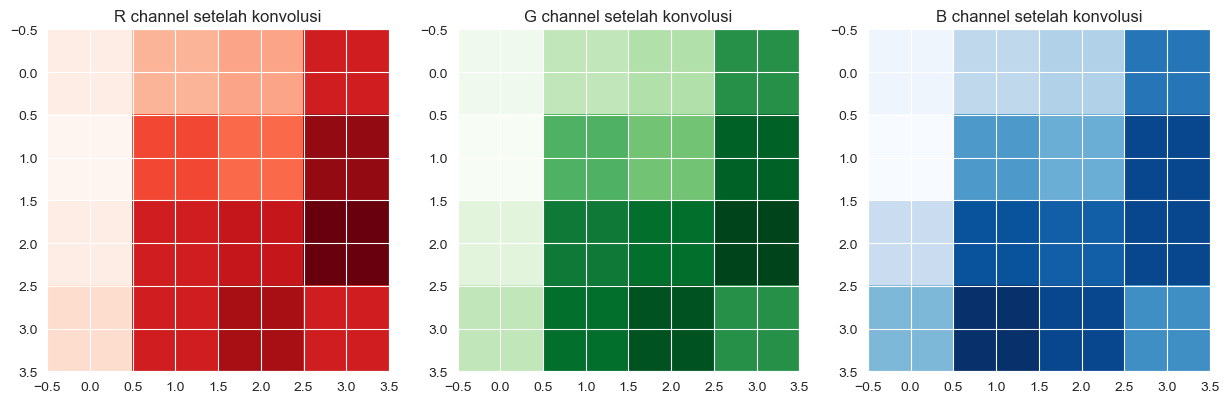

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def display_rgb_arrays(image_path, top_left_x, top_left_y):
    # Baca gambar
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Konversi dari BGR ke RGB

    # Tentukan koordinat untuk memotong bagian 6x6 dari gambar
    crop_size = 6
    x, y = top_left_x, top_left_y

    # Potong bagian 6x6 dari gambar
    cropped_img = img[y:y + crop_size, x:x + crop_size]

    # Ekstrak saluran R, G, dan B
    R = cropped_img[:, :, 0]
    G = cropped_img[:, :, 1]
    B = cropped_img[:, :, 2]

    # Tampilkan nilai piksel untuk masing-masing saluran warna
    print("R channel (6x6 array):")
    print(R)
    print("\nG channel (6x6 array):")
    print(G)
    print("\nB channel (6x6 array):")
    print(B)

    # Definisikan filter konvolusi
    kernel = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])

    # Fungsi untuk melakukan konvolusi 2D
    def convolve2d(image, kernel):
        kernel_height, kernel_width = kernel.shape
        image_height, image_width = image.shape
        output = np.zeros((image_height - kernel_height + 1, image_width - kernel_width + 1))
        
        for y in range(image_height - kernel_height + 1):
            for x in range(image_width - kernel_width + 1):
                region = image[y:y + kernel_height, x:x + kernel_width]
                output[y, x] = np.sum(region * kernel)
        
        return output

    # Lakukan konvolusi pada masing-masing saluran warna
    R_conv = convolve2d(R, kernel)
    G_conv = convolve2d(G, kernel)
    B_conv = convolve2d(B, kernel)

    # Tampilkan hasil konvolusi
    print("\nR channel setelah konvolusi:")
    print(R_conv)
    print("\nG channel setelah konvolusi:")
    print(G_conv)
    print("\nB channel setelah konvolusi:")
    print(B_conv)

    # Plotkan hasil konvolusi menggunakan Matplotlib
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(R_conv, cmap='Reds')
    plt.title("R channel setelah konvolusi")

    plt.subplot(1, 3, 2)
    plt.imshow(G_conv, cmap='Greens')
    plt.title("G channel setelah konvolusi")

    plt.subplot(1, 3, 3)
    plt.imshow(B_conv, cmap='Blues')
    plt.title("B channel setelah konvolusi")

    plt.show()

# Path ke gambar yang ingin digunakan
image_path = '../Beef1/Meat/test/fresh/Fresh (1166).jpg'
top_left_x, top_left_y = 0, 0  # Koordinat bagian atas kiri dari area yang akan dipotong

display_rgb_arrays(image_path, top_left_x, top_left_y)


In [19]:
import numpy as np

# Nilai output
O1 = 33.488
O2 = 100.464

# Hitung eksponensial dari setiap nilai output
exp_O1 = np.exp(O1)
exp_O2 = np.exp(O2)

# Jumlahkan semua nilai eksponensial
sum_exp = exp_O1 + exp_O2

# Hitung softmax untuk masing-masing output
softmax_O1 = exp_O1 / sum_exp
softmax_O2 = exp_O2 / sum_exp

softmax_O1, softmax_O2


(8.178860108140896e-30, 1.0)

In [20]:
import numpy as np

# Nilai output
O1 = 33.488
O2 = 100.464

# Hitung eksponensial dari setiap nilai output
exp_O1 = np.exp(O1)
exp_O2 = np.exp(O2)

# Jumlahkan semua nilai eksponensial
sum_exp = exp_O1 + exp_O2

# Hitung softmax untuk masing-masing output
softmax_O1 = exp_O1 / sum_exp
softmax_O2 = exp_O2 / sum_exp

softmax_O1, softmax_O2


(8.178860108140896e-30, 1.0)

In [51]:
import math

# Nilai eksponensial yang diberikan
numerator = math.exp(1026.648)
denominator = math.exp(769.392) - math.exp(1026.648)

# Hasil dari ekspresi
result = numerator / denominator
result


OverflowError: math range error

In [50]:
# Hitung e^257.256
exp_value = math.exp(257.256)
exp_2_value = math.exp(-7.37159143917368)
# Hasil dari ekspresi
result = 1 / (1 + exp_value)
print(result)
result2 = 1 / (1 + exp_2_value)
print(result2)


1.8842510393369524e-112
0.9993715286452242


In [22]:
import numpy as np

# Nilai pada hidden layer kedua
H1 = 71.76
H2 = 119.6
H3 = 47.84
H4 = 95.68

# Fungsi untuk menghitung softmax
def softmax(x):
    exp_x = np.exp(x - np.max(x))  # Stabilitas numerik
    return exp_x / exp_x.sum(axis=0)

# Mengacak bobot untuk output layer
np.random.seed(0)  # Untuk hasil yang konsisten
weights_output = np.random.rand(2, 4)  # Dua neuron output, empat input dari hidden layer kedua

# Menghitung nilai output
O = np.dot(weights_output, [H1, H2, H3, H4])

# Menerapkan softmax pada nilai output
softmax_output = softmax(O)

softmax_output, weights_output


(array([3.28945622e-04, 9.99671054e-01]),
 array([[0.5488135 , 0.71518937, 0.60276338, 0.54488318],
        [0.4236548 , 0.64589411, 0.43758721, 0.891773  ]]))

In [32]:

# Step 1: Combine channels and apply ReLU activation
R = np.array([[-2, 3, 4, 13],
              [-3, 10, 8, 17],
              [-2, 13, 14, 19],
              [0, 13, 16, 13]])

G = np.array([[-2, 3, 4, 13],
              [-3, 10, 8, 17],
              [0, 15, 16, 19],
              [3, 16, 18, 13]])

B = np.array([[-2, 3, 4, 13],
              [-3, 10, 8, 17],
              [2, 16, 15, 17],
              [7, 19, 17, 11]])

combined = R + G + B
combined = np.maximum(combined, 0)

In [33]:
# Step 3: Max Pooling
def max_pooling(matrix, pool_size=2, strides=2):
    output_shape = (
        (matrix.shape[0] - pool_size) // strides + 1,
        (matrix.shape[1] - pool_size) // strides + 1
    )
    output = np.zeros(output_shape)
    for i in range(0, matrix.shape[0] - pool_size + 1, strides):
        for j in range(0, matrix.shape[1] - pool_size + 1, strides):
            output[i // strides, j // strides] = np.max(matrix[i:i + pool_size, j:j + pool_size])
    return output

pooled = max_pooling(combined)


In [34]:
# Step 4: Flatten layer
flattened = pooled.flatten()

In [35]:
# Step 5 and 6: Hidden layer and Output layer calculations with random weights
np.random.seed(42)  # For consistency
weights_hidden1 = np.random.rand(4, 4)  # 4 inputs to 4 neurons in the first hidden layer
weights_hidden2 = np.random.rand(4, 4)  # 4 inputs to 4 neurons in the second hidden layer
weights_output = np.random.rand(4, 2)   # 4 inputs from the second hidden layer to 2 output neurons

# First hidden layer
hidden1 = np.dot(flattened, weights_hidden1)
hidden1 = np.maximum(hidden1, 0)  # ReLU activation

# Second hidden layer
hidden2 = np.dot(hidden1, weights_hidden2)
hidden2 = np.maximum(hidden2, 0)  # ReLU activation

# Output layer
output = np.dot(hidden2, weights_output)

In [36]:

# Softmax activation
def softmax(x):
    exp_x = np.exp(x - np.max(x))  # For numerical stability
    return exp_x / exp_x.sum(axis=0)

softmax_output = softmax(output)

In [37]:

print("Combined channel after ReLU:")
print(combined)
print("\nPooled result:")
print(pooled)
print("\nFlattened layer:")
print(flattened)
print("\nHidden layer 1 output:")
print(hidden1)
print("\nHidden layer 2 output:")
print(hidden2)
print("\nOutput before softmax:")
print(output)
print("\nSoftmax output:")
print(softmax_output)

Combined channel after ReLU:
[[ 0  9 12 39]
 [ 0 30 24 51]
 [ 0 44 45 55]
 [10 48 51 37]]

Pooled result:
[[30. 51.]
 [48. 55.]]

Flattened layer:
[30. 51. 48. 55.]

Hidden layer 1 output:
[ 93.83102004  82.14328455  35.9105114  118.77765891]

Hidden layer 2 output:
[165.55028839  94.41025673 143.86070551  96.14137029]

Output before softmax:
[211.53993064 289.77731863]

Softmax output:
[1.0518023e-34 1.0000000e+00]


<a id="t3."></a>
# 3. Classification (CNN)

In [33]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split

In [34]:
labels = LabelEncoder()
labels.fit(image_train_target)

LabelEncoder()

In [35]:
X = image_train_data / 255.0
y = labels.transform(image_train_target)
# tX = image_test_data / 255.0
# ty = labels.transform(image_test_target)
train_images, test_images, train_labels, test_labels = train_test_split(X,y, test_size=0.15, random_state=123)

In [113]:
# train_images, train_labels = X , y
# test_images , test_labels = tX, ty

In [44]:
# Membuat model Sequential
model = models.Sequential()
# model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(width,height,3)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(32, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten(input_shape=(width,height,3)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(2))

In [45]:
# callback if accuracy and val_accucary above or reached 99% training stop

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('accuracy') > 0.99 and logs.get('val_accuracy') > 0.99):
            print("\nReached or Exceed 99.0% accuracy so cancelling training!")
            self.model.stop_training = True
            

In [46]:
# from sklearn.preprocessing import LabelEncoder
# 
# # Assuming you've already defined train_images, test_images, train_labels, and test_labels
# 
# # Convert train_labels and test_labels to integers using LabelEncoder
# label_encoder = LabelEncoder()
# train_labels_encoded = label_encoder.fit_transform(train_labels)
# test_labels_encoded = label_encoder.transform(test_labels)
# 
# # Compile the model
# model.compile(optimizer='RMSprop',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])
# 
# #declare myCallback() class
# callback = myCallback()
# 
# # Fit the model
# history = model.fit(train_images, train_labels_encoded, epochs=30, 
#                     validation_data=(test_images, test_labels_encoded),
#                     batch_size=32,
#                     verbose=1, callbacks=callback)


In [47]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
79/79 [==============================] - 6s 68ms/step - loss: 2.0629 - accuracy: 0.9222 - val_loss: 7.8754e-04 - val_accuracy: 1.0000
Epoch 2/10
79/79 [==============================] - 3s 42ms/step - loss: 0.0388 - accuracy: 0.9876 - val_loss: 0.0160 - val_accuracy: 0.9977
Epoch 3/10
79/79 [==============================] - 3s 42ms/step - loss: 0.0252 - accuracy: 0.9932 - val_loss: 4.3473e-04 - val_accuracy: 1.0000
Epoch 4/10
79/79 [==============================] - 3s 42ms/step - loss: 0.0119 - accuracy: 0.9964 - val_loss: 0.0034 - val_accuracy: 0.9977
Epoch 5/10
79/79 [==============================] - 3s 42ms/step - loss: 0.0122 - accuracy: 0.9972 - val_loss: 0.0577 - val_accuracy: 0.9752
Epoch 6/10
79/79 [==============================] - 3s 43ms/step - loss: 0.0113 - accuracy: 0.9948 - val_loss: 1.6139e-04 - val_accuracy: 1.0000
Epoch 7/10
79/79 [==============================] - 3s 42ms/step - loss: 0.0088 - accuracy: 0.9960 - val_loss: 1.0204e-05 - val_accuracy: 1.00

14/14 - 0s - loss: 0.0496 - accuracy: 0.9774 - 147ms/epoch - 11ms/step


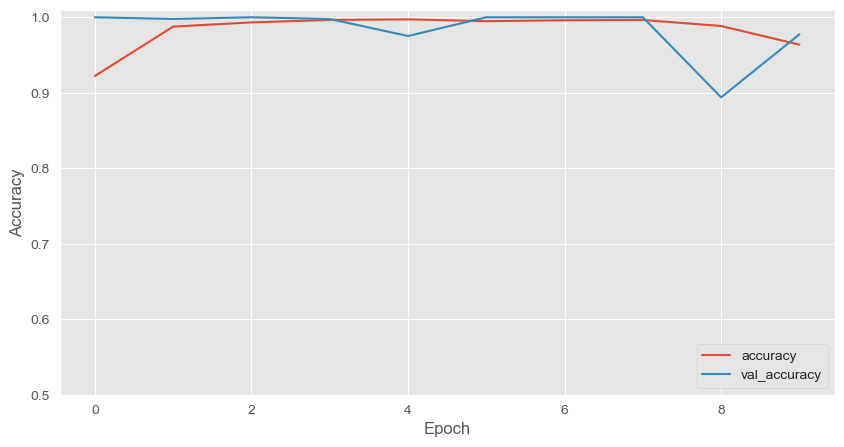

In [48]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.01])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [49]:
result=model.evaluate(test_images, test_labels)

14/14 [==============================] - 0s 7ms/step - loss: 0.0496 - accuracy: 0.9774


In [50]:
for i in range(len(model.metrics_names)):
    print(model.metrics_names[i],":",result[i])

loss : 0.049576736986637115
accuracy : 0.9774266481399536


<a id="t4."></a>
# 4. Prediction

In [51]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

14/14 [==============================] - 0s 6ms/step


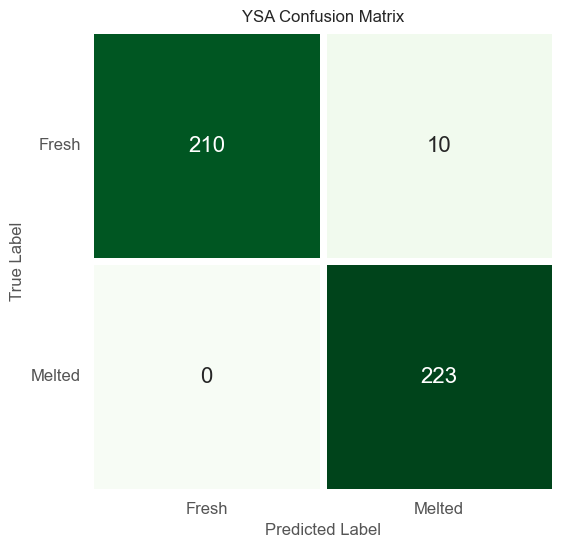

In [52]:
y_pred = model.predict(test_images)

def toClass(pred):
    
    class_ = np.zeros(len(pred))
    for i in range(len(pred)):
        index = pred[i].argmax()
        class_[i] = index
        
    return class_

cm = confusion_matrix(test_labels,toClass(y_pred))

df1 = pd.DataFrame(columns=["Fresh","Melted"], index= ["Fresh","Melted"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="Greens", fmt= '.0f',ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("YSA Confusion Matrix", size = 12)
plt.show()

In [53]:
from sklearn.metrics import classification_report

# Prediksi kelas untuk data uji
y_pred_class = toClass(y_pred)

# Buat classification report
report = classification_report(test_labels, y_pred_class, target_names=files)

# Tampilkan classification report
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

       Fresh       1.00      0.95      0.98       220
      Melted       0.96      1.00      0.98       223

    accuracy                           0.98       443
   macro avg       0.98      0.98      0.98       443
weighted avg       0.98      0.98      0.98       443


In [54]:
def Prediction(image):
    
    global width, height, files, labels
    
    img = cv2.resize(image,(width,height))
    
    test = img / 255.0
    
    pred = model.predict(np.array([image])).argmax()
    
    return labels.inverse_transform([pred])[0]

1/1 [==============================] - 0s 22ms/step


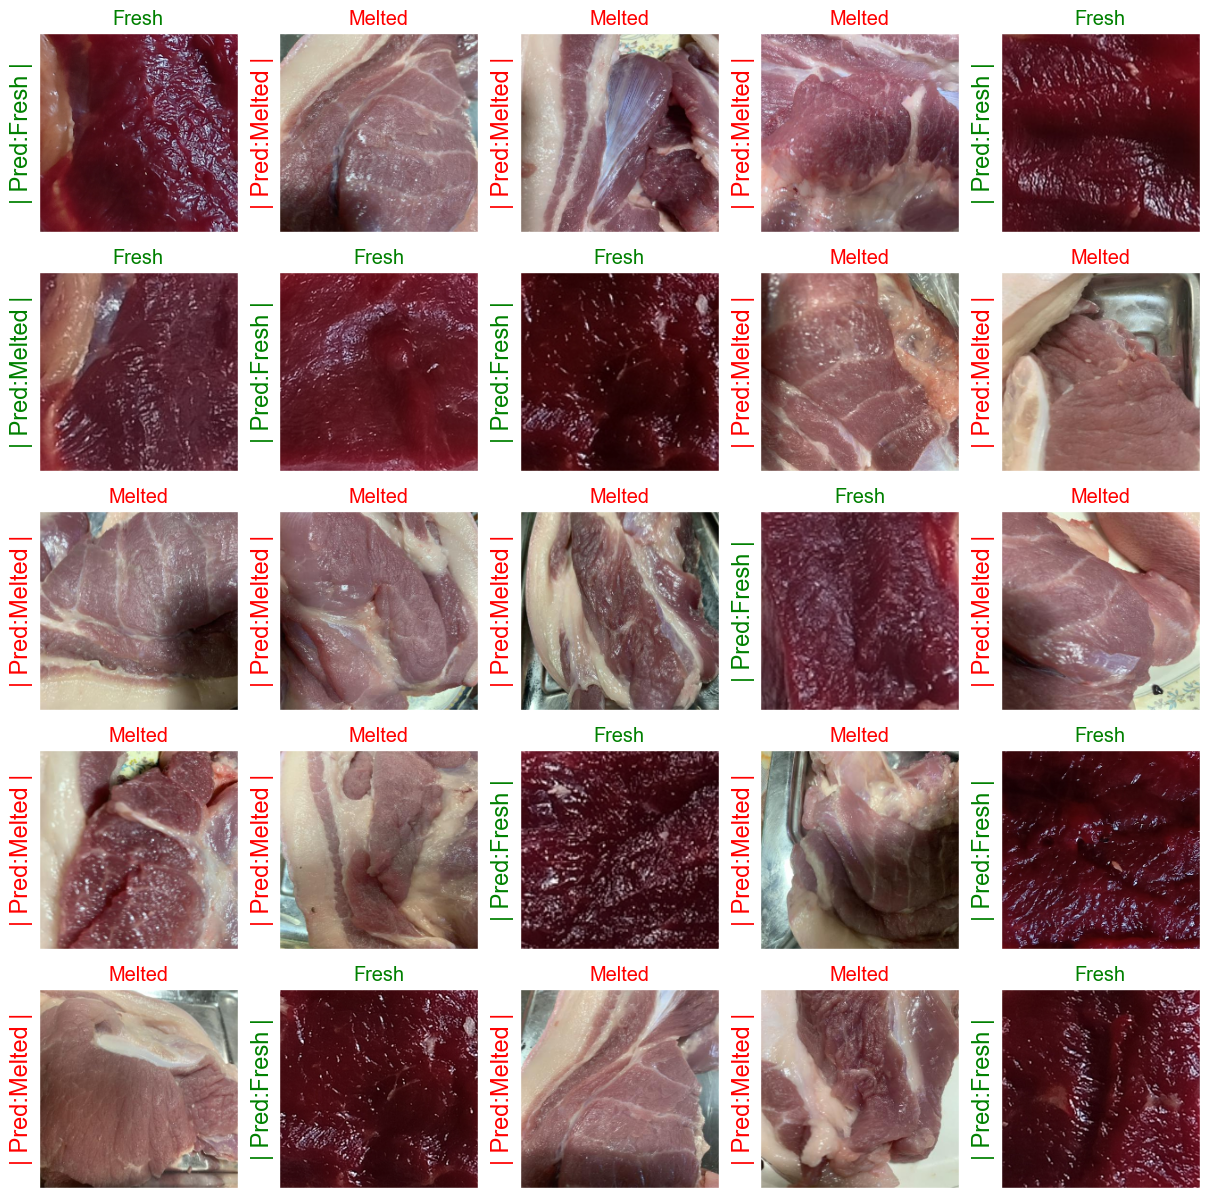

In [66]:
plt.figure(figsize=(15,15))
for i in range(1,26):
    fig = np.random.choice(np.arange(size_train))
    plt.subplot(5,5,i)
    plt.imshow(image_train_data[fig])
    if image_train_target[fig]=='Fresh':
        c='green'
    else:
        c='red'
    plt.title(image_train_target[fig], color=c)
    plt.ylabel("| Pred:{} |".format(Prediction(image_train_data[fig])),fontsize=17, color=c)
    plt.xticks([]), plt.yticks([])
plt.show()